In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bikedata/bike data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from plotly import express as px
import cufflinks as cf
import plotly.graph_objects as go

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

![](https://www.blogto.com/upload/2015/04/201144-petes-bikes-acc.jpg)

In [3]:
url = '../input/bikedata/bike data.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,11/26/2013,2013,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
1,11/26/2015,2015,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
2,3/23/2014,2014,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23,45,120,1035,2401,1366
3,3/23/2016,2016,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20,45,120,900,2088,1188
4,5/15/2014,2014,11046,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4,45,120,180,418,238


In [5]:
df.describe()

,year,Customer ID,Customer Age,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
count,113036.000000,113036.000000,113036.000000,25982.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014.401739,19227.874341,35.919212,47.313063,11.901660,267.296366,452.938427,469.318695,754.370360,285.051665
std,1.272510,5307.581302,11.021936,6.860797,9.561857,549.835483,922.071219,884.866118,1309.094674,453.887443
min,2011.000000,11000.000000,17.000000,38.000000,1.000000,1.000000,2.000000,1.000000,2.000000,-30.000000
25%,2013.000000,14611.000000,28.000000,42.000000,2.000000,2.000000,5.000000,28.000000,63.000000,29.000000
50%,2014.000000,18664.000000,35.000000,46.000000,10.000000,9.000000,24.000000,108.000000,223.000000,101.000000
75%,2016.000000,23475.000000,43.000000,52.000000,20.000000,42.000000,70.000000,432.000000,800.000000,358.000000
max,2016.000000,29483.000000,87.000000,62.000000,32.000000,2171.000000,3578.000000,42978.000000,58074.000000,15096.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   year              113036 non-null  int64  
 2   Customer ID       113036 non-null  int64  
 3   Customer Age      113036 non-null  int64  
 4   Age Group         113036 non-null  object 
 5   Customer Gender   113036 non-null  object 
 6   Country           113036 non-null  object 
 7   State             113036 non-null  object 
 8   Product Category  113036 non-null  object 
 9   Sub Category      113036 non-null  object 
 10  Product           113036 non-null  object 
 11  Frame Size        25982 non-null   float64
 12  Order Quantity    113036 non-null  int64  
 13  Unit Cost         113036 non-null  int64  
 14  Unit Price        113036 non-null  int64  
 15  Cost              113036 non-null  int64  
 16  Revenue           11

In [7]:
df.columns

Index(['Date', 'year', 'Customer ID', 'Customer Age', 'Age Group',
       'Customer Gender', 'Country', 'State', 'Product Category',
       'Sub Category', 'Product', 'Frame Size', 'Order Quantity', 'Unit Cost',
       'Unit Price', 'Cost', 'Revenue', 'Profit'],
      dtype='object')

# Correlations

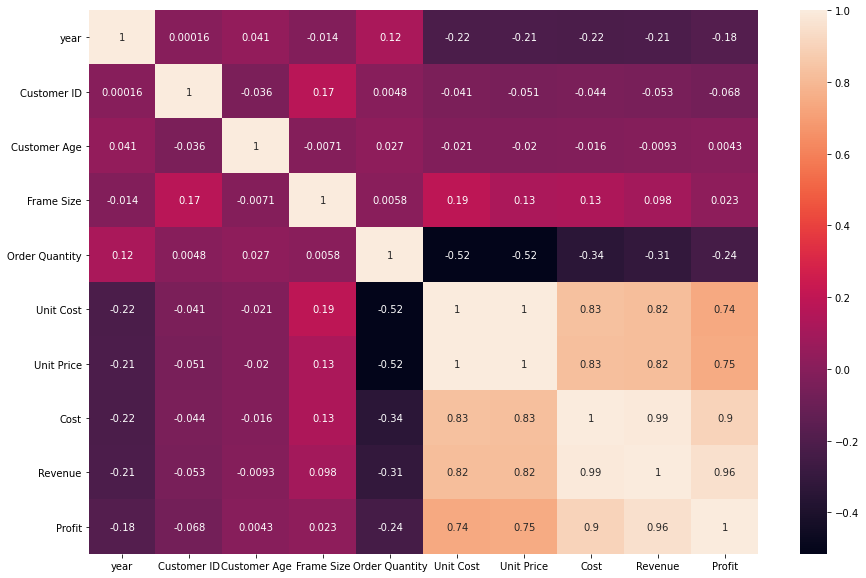

In [8]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

# Profit / Sales

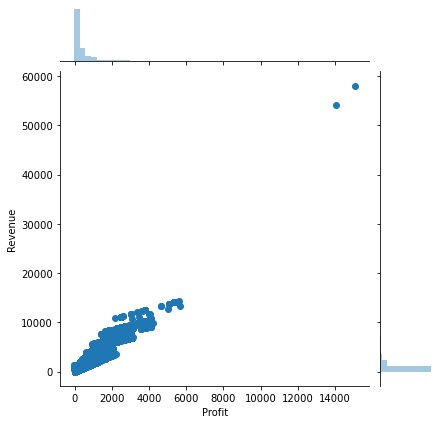

In [9]:
sns.jointplot('Profit','Revenue',data=df)

# Gross / Year

In [10]:
df_year = df.groupby('year',as_index=False).sum()

In [11]:
px.line(df_year,x='year',y='Profit',labels={'x':'Years','y':'Gross'},title='Gross By Years')

### low insights from 2015 to 2016 in profit 

# Category Orders by Year

In [12]:
year_cat = df[['year','Product Category']]
year_cat  = pd.get_dummies(year_cat).groupby('year',as_index=False).sum()
year_cat

,year,Product Category_Accessories,Product Category_Bikes,Product Category_Clothing
0,2011,0.0,2677.0,0.0
1,2012,0.0,2677.0,0.0
2,2013,15025.0,5710.0,3708.0
3,2014,20035.0,4604.0,4759.0
4,2015,15025.0,5710.0,3708.0
5,2016,20035.0,4604.0,4759.0


In [13]:
year_cat.columns

Index(['year', 'Product Category_Accessories', 'Product Category_Bikes',
       'Product Category_Clothing'],
      dtype='object')

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=year_cat.year,y=year_cat['Product Category_Accessories'],mode='lines',name='Accessories'))
fig.add_trace(go.Scatter(x=year_cat.year,y=year_cat['Product Category_Bikes'],mode='lines',name='Bikes'))
fig.add_trace(go.Scatter(x=year_cat.year,y=year_cat['Product Category_Clothing'],mode='lines',name='Clothing'))



### Most demanding category is Accessories , Bikes orders dicrease from 2015

# Bikes sub category

In [15]:
df2 = df.loc[df['Product Category']=='Bikes']

In [16]:
tabl = pd.pivot_table(df2, values='Profit', index=['year'],
                    columns=['Sub Category'], aggfunc=np.sum)
tabl

Sub Category,Mountain Bikes,Road Bikes,Touring Bikes
year,,,
2011,834516.0,2046785.0,NaN
2012,831891.0,2120102.0,NaN
2013,1437880.0,1453589.0,398941.0
2014,1169737.0,913960.0,507803.0
2015,2146813.0,2194586.0,597528.0
2016,1739626.0,1349853.0,775666.0


In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=tabl['Mountain Bikes'],mode='lines',name='Mountain Bikes',line=dict(color='royalblue')))
fig.add_trace(go.Scatter(y=tabl['Road Bikes'],mode='lines',name='Road Bikes'))
fig.add_trace(go.Scatter(y=tabl['Touring Bikes'],mode='lines',name='Touring Bikes'))

### Mountain Bikes & Road Bikes Cause of Dicrease

In [18]:
tab5 = pd.pivot_table(df2, values='Order Quantity', index=['year'],
                    columns=['Sub Category'], aggfunc=np.sum)
tab5

Sub Category,Mountain Bikes,Road Bikes,Touring Bikes
year,,,
2011,1245.0,4015.0,NaN
2012,1230.0,4124.0,NaN
2013,2088.0,2797.0,825.0
2014,1724.0,1856.0,1024.0
2015,3124.0,4202.0,1230.0
2016,2581.0,2777.0,1569.0


In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=tab5['Mountain Bikes'],mode='lines',name='Mountain Bikes',line=dict(color='royalblue')))
fig.add_trace(go.Scatter(y=tab5['Road Bikes'],mode='lines',name='Road Bikes'))

# Category Profits By years 

In [20]:
table = pd.pivot_table(df, values='Profit', index=['year'],
                    columns=['Product Category'], aggfunc=np.sum)
table

Product Category,Accessories,Bikes,Clothing
year,,,
2011,NaN,2881301.0,NaN
2012,NaN,2951993.0,NaN
2013,1985231.0,3290410.0,683567.0
2014,2515513.0,2591500.0,757074.0
2015,1927540.0,4938927.0,662096.0
2016,2434093.0,3865145.0,736710.0


In [21]:
table.columns

Index(['Accessories', 'Bikes', 'Clothing'], dtype='object', name='Product Category')

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=table.Accessories,mode='lines',name='Accessories'))
fig.add_trace(go.Scatter(y=table.Bikes,mode='lines',name='Bikes'))
fig.add_trace(go.Scatter(y=table.Clothing,mode='lines',name='Clothing'))

### Bikes is the most profitable category 

# Gender

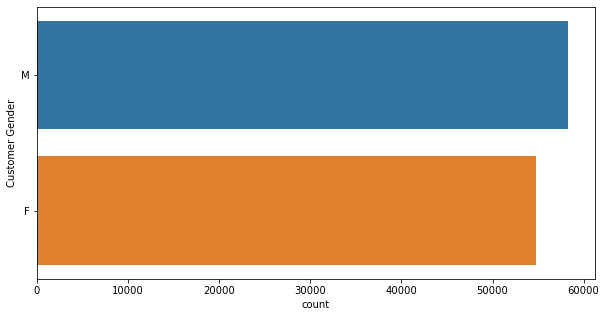

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Customer Gender'],data=df)

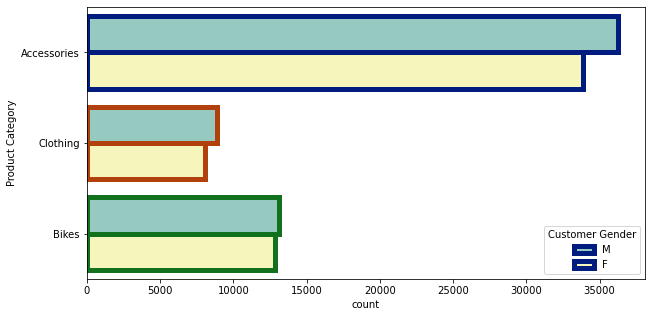

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Product Category'],data=df,hue=df['Customer Gender'],linewidth=5, palette="Set3",edgecolor=sns.color_palette("dark", 3))

In [25]:
table2 = pd.pivot_table(df, values='Profit', index=['year'],
                    columns=['Customer Gender'], aggfunc=np.sum)

In [26]:
table2

Customer Gender,F,M
year,,
2011,1475580,1405721
2012,1512853,1439140
2013,2981277,2977931
2014,2716334,3147753
2015,3767734,3760829
2016,3280090,3755858


In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=table2.F,mode='lines',name='Female'))
fig.add_trace(go.Scatter(y=table2.M,mode='lines',name='Male',line=dict(color="#ffe476")))

### Notice: Female starts to lose passion from 2015

## female & Road,Mountain Bikes

In [28]:
df2

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
49304,1/28/2013,2013,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",38.0,1,1912,3400,1912,2856,944
49305,1/28/2015,2015,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",38.0,1,1912,3400,1912,2856,944
49306,7/22/2013,2013,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",38.0,1,1912,3400,1912,2856,944
49307,7/22/2015,2015,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",38.0,2,1912,3400,3824,5712,1888
49308,12/25/2013,2013,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",38.0,1,1912,3400,1912,2856,944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112067,1/18/2016,2016,29480,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",54.0,3,1482,2384,4446,6866,2420
112068,2/27/2014,2014,29480,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",54.0,1,1482,2384,1482,2289,807
112069,2/27/2016,2016,29480,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",54.0,2,1482,2384,2964,4577,1613
112070,6/13/2014,2014,29480,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",54.0,1,1482,2384,1482,2289,807


In [29]:
#tab6 = pd.pivot_table(df2, values='Profit', index=['year',"Customer Gender"],
                    #columns=['Sub Category'], aggfunc=np.sum)
tab6=df2.groupby(['year',"Customer Gender"]).agg({'Order Quantity':'sum'})
tab6.unstack(1)

Order Quantity      
Customer Gender              F     M
year                                
2011                      2692  2568
2012                      2748  2606
2013                      2883  2827
2014                      2169  2435
2015                      4310  4246
2016                      3247  3680

# Countries 

In [30]:
cont = pd.pivot_table(df, values='Profit', index=['year'],
                    columns=['Country'], aggfunc=np.sum).reset_index()
cont

Country,year,Australia,Canada,France,Germany,United Kingdom,United States
0,2011,710466,303494,277373,270488,303817,1015663
1,2012,716091,319965,279851,271280,308917,1055889
2,2013,1339820,716152,514857,555178,788831,2044370
3,2014,995473,738136,521699,685189,882699,2040891
4,2015,1802346,828380,649297,716502,1017427,2514611
5,2016,1211834,811169,637205,861358,1112162,2402220


In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=cont.Australia,mode='lines',name='Australia',line=dict(color="#FFBF00")))
fig.add_trace(go.Scatter(y=cont.Canada,mode='lines',name='Canada',line=dict(color="#E32636")))
fig.add_trace(go.Scatter(y=cont.France,mode='lines',name='France',line=dict(color="#0048BA")))
fig.add_trace(go.Scatter(y=cont.Germany,mode='lines',name='Germany',line=dict(color="#7CB9E8")))
fig.add_trace(go.Scatter(y=cont['United Kingdom'],mode='lines',name='United Kingdom',line=dict(color="#F19CBB")))
fig.add_trace(go.Scatter(y=cont['United States'],mode='lines',name='USA',line=dict(color="#2200CC")))


### Australia & USA maybe the reason 

# Sales track

In [32]:
cont2 = pd.pivot_table(df, values='Revenue', index=['year','Country'],
                    columns=[], aggfunc=np.sum).reset_index()
cont2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     36 non-null     int64 
 1   Country  36 non-null     object
 2   Revenue  36 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 992.0+ bytes


In [33]:
fig = px.choropleth(cont2, locations = cont2['Country'],
                    color = cont2['Revenue'],locationmode='country names',hover_name = cont2['Revenue'], 
                    color_continuous_scale = px.colors.sequential.Inferno,
                    animation_frame='year')
fig.update_layout(title='Sales tracking',template='plotly_dark')
fig.show()

## profit track for country 

In [34]:
df['Date']=pd.to_datetime(df.Date)

In [35]:
df_florish = pd.pivot_table(df, values='Profit', 
                     index=['Country'], 
                     columns='Date')
df_florish = df_florish.fillna(0)
df_florish.to_csv('florish.csv')

In [36]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/4798895" data-url="https://flo.uri.sh/visualisation/4798895/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

## Australia

In [37]:
aust_df = df.loc[df['Country']=='Australia']
aust_bike= df.loc[df['Product Category']=='Bikes']
aust_subbike = pd.pivot_table(aust_bike, values='Order Quantity', index=['year'],
                    columns=['Sub Category'], aggfunc=np.sum)
aust_subbike

Sub Category,Mountain Bikes,Road Bikes,Touring Bikes
year,,,
2011,1245.0,4015.0,NaN
2012,1230.0,4124.0,NaN
2013,2088.0,2797.0,825.0
2014,1724.0,1856.0,1024.0
2015,3124.0,4202.0,1230.0
2016,2581.0,2777.0,1569.0


In [38]:
aust_bike_gender = pd.pivot_table(aust_bike, values='Order Quantity', index=['year'],
                    columns=['Customer Gender'], aggfunc=np.sum)
aust_bike_gender

Customer Gender,F,M
year,,
2011,2692,2568
2012,2748,2606
2013,2883,2827
2014,2169,2435
2015,4310,4246
2016,3247,3680


In [39]:
aust_bike_states = pd.pivot_table(aust_bike, values='Order Quantity', index=['year','State'],
                    columns=[], aggfunc=np.sum).reset_index()
aust_bike_states

,year,State,Order Quantity
0,2011,Alberta,6
1,2011,Bayern,58
2,2011,Brandenburg,6
3,2011,British Columbia,423
4,2011,California,995
...,...,...,...
215,2016,Val d'Oise,10
216,2016,Val de Marne,13
217,2016,Victoria,391
218,2016,Washington,558


In [40]:
px.line(aust_bike_states, x="year", y="Order Quantity", color='State')


## USA

In [41]:
usa = df.loc[df['Country']=='United States']
usa_bike= df.loc[df['Product Category']=='Bikes']
usa_bike_15_16=usa_bike.loc[df['year']>2014]
usa_bike_state = pd.pivot_table(usa_bike_15_16, values='Order Quantity', index=['year','State'],
                    columns=[], aggfunc=np.sum).reset_index()
usa_bike_state['year'].unique()

array([2015, 2016])

In [42]:
usa_bike_gender = pd.pivot_table(usa_bike_15_16, values='Order Quantity', index=['year'],
                    columns=['Customer Gender'], aggfunc=np.sum)
usa_bike_gender

Customer Gender,F,M
year,,
2015,4310,4246
2016,3247,3680


In [43]:
px.line(usa_bike_state, x="year", y="Order Quantity", color='State')


## Female

In [44]:
female=df.loc[df['Customer Gender']=="F"]
female_bikes =female.loc[df['Product Category']=="Bikes"]
female_bikes['Product Category'].unique()

array(['Bikes'], dtype=object)

In [45]:
female_country = pd.pivot_table(female_bikes, values='Order Quantity', index=['year','Country'],
                    columns=[], aggfunc=np.sum).reset_index()


In [46]:
px.line(female_country , x="year", y="Order Quantity", color='Country')

## Male 

In [47]:
male=df.loc[df['Customer Gender']=="M"]
male_bikes =male.loc[df['Product Category']=="Bikes"]
#==
male_country = pd.pivot_table(male_bikes, values='Order Quantity', index=['year','Country'],
                    columns=[], aggfunc=np.sum).reset_index()
#== 
px.line(male_country , x="year", y="Order Quantity", color='Country')


males bike orders line chart is good in united kingdom unlike females, and less dicrease in USA than females

# Customer Age

In [48]:
bikes =df.loc[df['Product Category']=="Bikes"]
bikf_15_16=usa_bike.loc[df['year']>2014]
cust_age = pd.pivot_table(bikf_15_16, values='Order Quantity', index=['year','Age Group'],
                    columns=[], aggfunc=np.sum).reset_index()
#==
px.line(cust_age , x="year", y="Order Quantity", color='Age Group')




# Conclusion

#### Sales decline from 2015 to 2016
#### Note that since the rise of accessories in 2013 there is an inverse relationship with bikes
#### The decline in Sales in 2016 was due to lower demand for bikes
#### especially mountain bikes and road bikes,There's a big drop in the U.S. and Australia 
#### Most of them are female, specifically in the 25-to 34-year-old age group

# MARKET BASKET ANALYSIS

#### Market basket analysis is a process that looks for relationships among entities and objects that frequently appear together, such as the collection of items in a shopper’s cart,This is helps alot Creating offers & Sort your sub categories in your stores  

In [49]:
! pip install --index-url https://test.pypi.org/simple/ PyARMViz

Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 12.9 MB 3.5 MB/s 


In [50]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import squarify
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
from PyARMViz import PyARMViz
from PyARMViz.Rule import generate_rule_from_dict

sns.set()
matplotlib.rcParams['figure.figsize'] = (36, 36)
style.use('ggplot')

In [51]:
transactions = [a[1]['Sub Category'].tolist() for a in list(df.groupby(['Customer ID','Date']))]
print(len(transactions))

75774


In [52]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)


In [53]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)


In [54]:
pf = transactions.describe()


In [55]:
f = pf.iloc[0]


In [56]:
f2 = pf.iloc[3]
f = f-f2

In [57]:
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
item

,Count,Item
14,19194,Tires and Tubes
11,13270,Road Bikes
7,12010,Helmets
2,9446,Bottles and Cages
10,8788,Mountain Bikes
9,5974,Jerseys
3,4336,Caps
5,4006,Fenders
15,3674,Touring Bikes
6,2678,Gloves


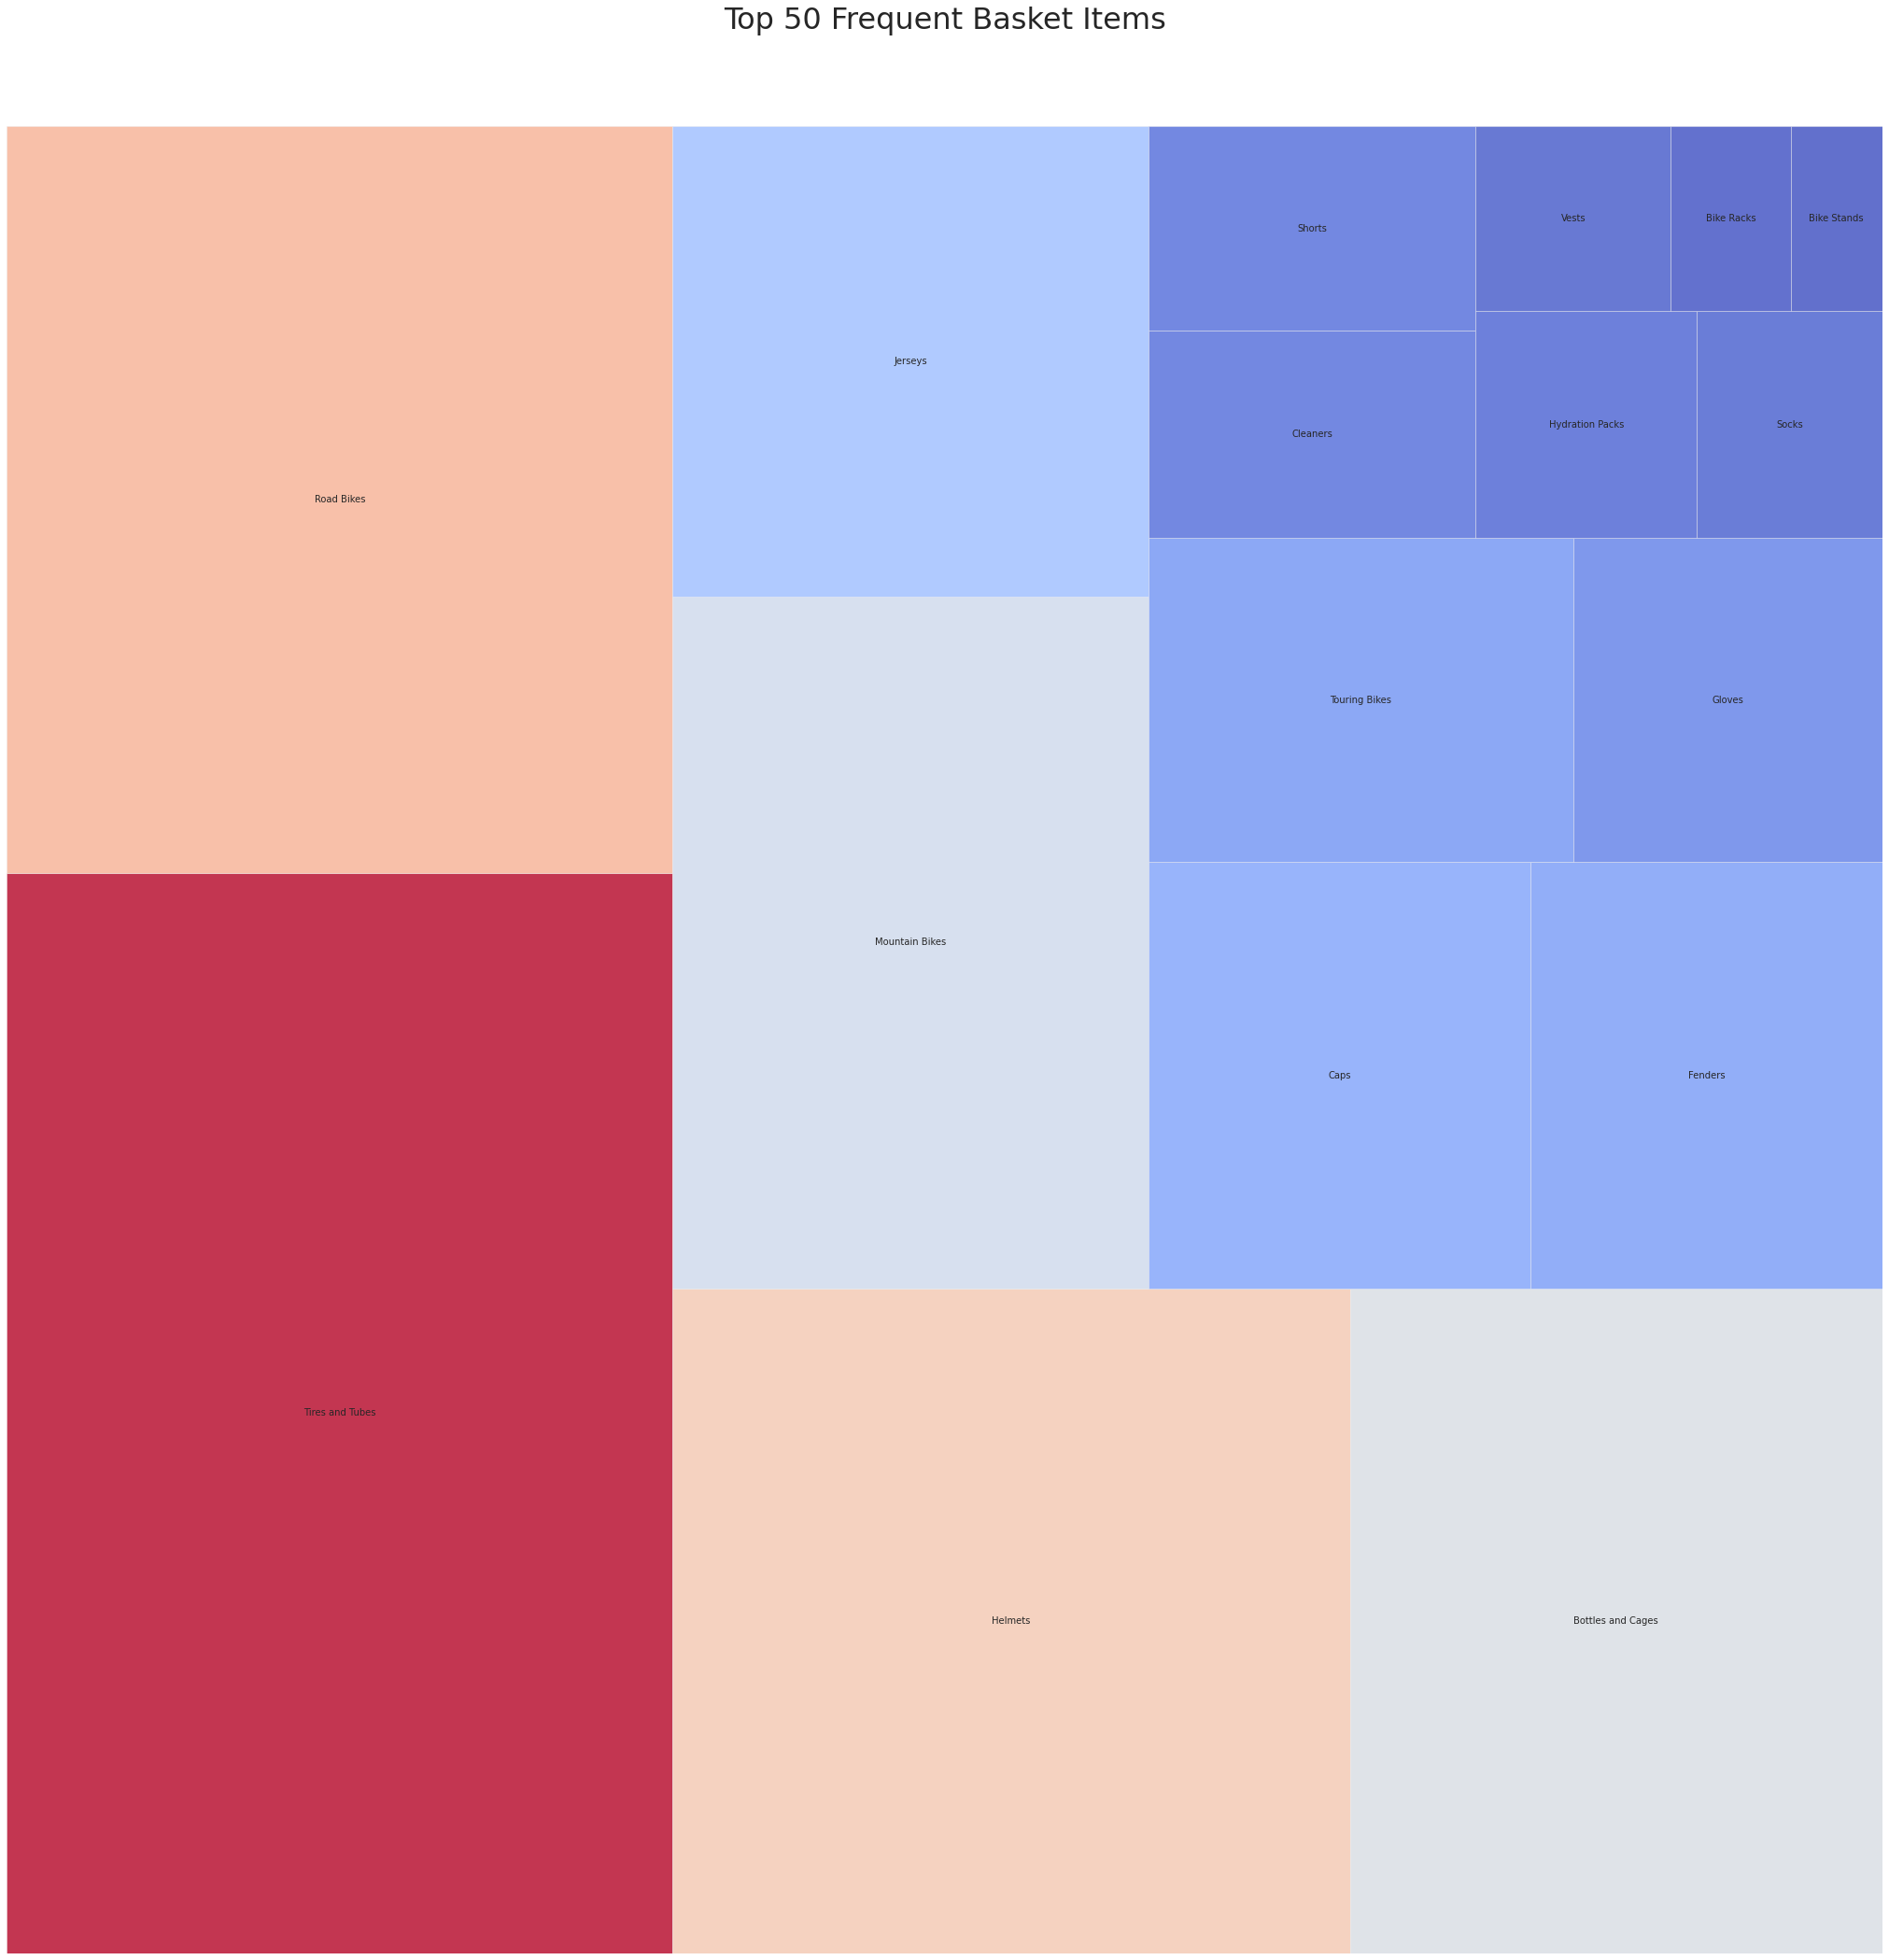

In [58]:
fig, ax = plt.subplots()

# set color scheme
cmap = matplotlib.cm.coolwarm

# Get upper and lower boudns for the color mapping
mini = min(item["Count"])
maxi = max(item["Count"])

# Set out color mapping limits 
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)

# Obtain our raw colors 
colors = [cmap(norm(value)) for value in item["Count"]]

# Create the TreeMap plot with Squarify
squarify.plot(sizes=item["Count"], label=item["Item"], alpha=0.8, color=colors)
plt.axis('off')
plt.title("Top 50 Frequent Basket Items", fontsize=32)
ttl = ax.title
ttl.set_position([.5, 1.05])

In [59]:
frequent_itemsets = apriori(transactions, min_support=0.001, use_colnames=True, max_len=5)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.size

240

In [60]:
b = association_rules(frequent_itemsets, metric="lift", min_threshold=0.001)
b['uni'] = np.nan
b['ant'] = np.nan
b['con'] = np.nan
b['tot'] = 75774

In [61]:
transactions = [a[1]['Sub Category'].tolist() for a in list(df.groupby(['Customer ID','Date']))]

def trans():
    for t in transactions:
        yield t
    
def ant(x):
    cnt = 0
    for t in trans():
        t = set(t)
        if x.intersection(t) == x:
            cnt = cnt + 1 
    return cnt

bb = b.values.tolist()  

In [62]:
rules_dict = []
for bbb in bb:
    bbb[10] = ant(bbb[0])
    bbb[11] = ant(bbb[1])
    bbb[9] = ant(bbb[0].union(bbb[1]))
    diction = {
        'lhs': tuple(bbb[0]), 
        'rhs': tuple(bbb[1]),
        'count_full': bbb[9],
        'count_lhs': bbb[10],
        'count_rhs': bbb[11],
        'num_transactions': bbb[12]
    }
    rules_dict.append(diction)

In [63]:
rules = []
for rd in rules_dict: 
    rules.append(generate_rule_from_dict(rd))

In [64]:
PyARMViz.generate_parallel_category_plot(rules)

# Best time to sell

In [65]:
L = ['dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df['Date'].dt, i).rename(i) for i in L), axis=1))
df2.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,...,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,dayofweek,dayofyear,weekofyear,quarter
49304,1/28/2013,2013,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,...,1,1912,3400,1912,2856,944,0,28,5,1
49305,1/28/2015,2015,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,...,1,1912,3400,1912,2856,944,2,28,5,1
49306,7/22/2013,2013,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,...,1,1912,3400,1912,2856,944,0,203,30,3
49307,7/22/2015,2015,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,...,2,1912,3400,3824,5712,1888,2,203,30,3
49308,12/25/2013,2013,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,...,1,1912,3400,1912,2856,944,2,359,52,4


In [66]:
df2['dayofweek'] = df2['dayofweek'] + 1
df2['dayofweek'].value_counts()

6    3784
5    3784
7    3770
3    3743
2    3650
1    3640
4    3611
Name: dayofweek, dtype: int64

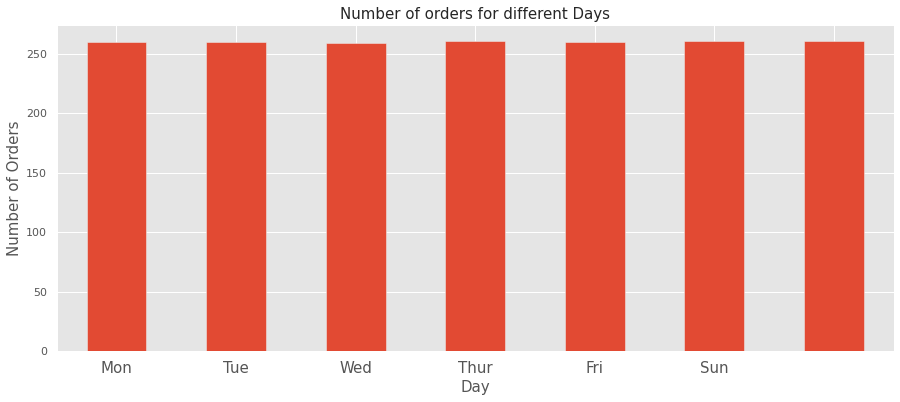

In [67]:

#=== 
ax = df2.groupby('Date')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

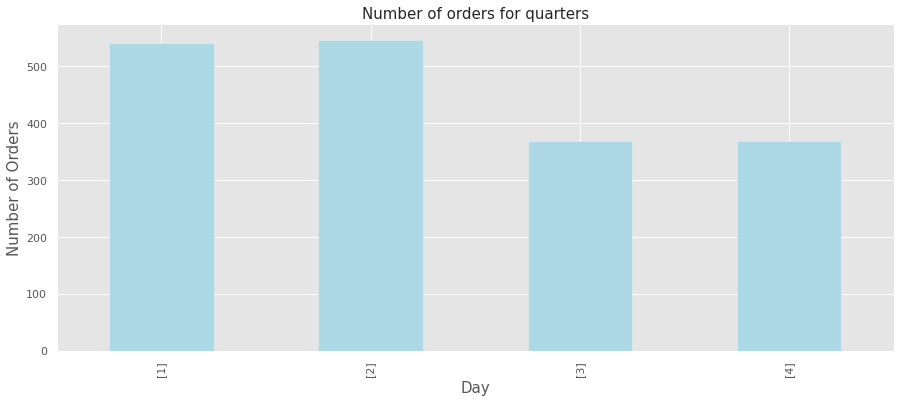

In [68]:
ax = df2.groupby('Date')['quarter'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6),color='lightblue')
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for quarters',fontsize=15)
plt.show()

# Customer Analysis

In [69]:
df = df.loc[df['Order Quantity'] > 0]
df = df[pd.notnull(df['Customer ID'])]

In [70]:
orders_df = df.groupby(['Customer ID', 'Date']).agg({'Revenue': sum,'Date': max})
#=== 
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 75774 entries, (11000, Timestamp('2013-01-28 00:00:00')) to (29483, Timestamp('2016-02-07 00:00:00'))
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Revenue  75774 non-null  int64         
 1   Date     75774 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 MB


In [71]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_df = orders_df.groupby('Customer ID').agg({'Revenue': [min, max, sum, groupby_mean, groupby_count]
      ,'Date': [min, max, purchase_duration, avg_frequency]})
summary_df

Revenue                                       Date             \
                min   max    sum          avg count        min        max   
Customer ID                                                                 
11000             7  8568  46673  2917.062500    16 2013-01-28 2016-06-22   
11001             4    12     16     8.000000     2 2013-07-20 2015-07-20   
11002          2725  2754  10986  2746.500000     4 2013-07-04 2015-08-27   
11005          2003  8505  38702  3225.166667    12 2013-02-07 2016-02-04   
11007           359  8058  43307  1968.500000    22 2013-07-04 2016-04-22   
...             ...   ...    ...          ...   ...        ...        ...   
29479          2584  2584   5168  2584.000000     2 2013-03-08 2015-03-08   
29480          2289  6866  32042  4005.250000     8 2013-12-05 2016-06-13   
29481          3341  4544  15770  3942.500000     4 2011-02-13 2016-02-24   
29482          3308  3308   6616  3308.000000     2 2013-03-22 2015-03-22   
29483          2134  4269  19207  2400.875000     8 2013-03-13 2016-02-07   

                                                  
            purchase_duration purchase_frequency  
Customer ID                                       
11000                    1241            77.5625  
11001                     730           365.0000  
11002                     784           196.0000  
11005                    1092            91.0000  
11007                    1023            46.5000  
...                       ...                ...  
29479                     730           365.0000  
29480                     921           115.1250  
29481                    1837           459.2500  
29482                     730           365.0000  
29483                    1061           132.6250  

[8232 rows x 9 columns]

In [72]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]


In [73]:
summary_df.head()

,revenue_min,revenue_max,revenue_sum,revenue_avg,revenue_count,date_min,date_max,date_purchase_duration,date_purchase_frequency
Customer ID,,,,,,,,,
11000,7,8568,46673,2917.062500,16,2013-01-28,2016-06-22,1241,77.5625
11001,4,12,16,8.000000,2,2013-07-20,2015-07-20,730,365.0000
11002,2725,2754,10986,2746.500000,4,2013-07-04,2015-08-27,784,196.0000
11005,2003,8505,38702,3225.166667,12,2013-02-07,2016-02-04,1092,91.0000
11007,359,8058,43307,1968.500000,22,2013-07-04,2016-04-22,1023,46.5000


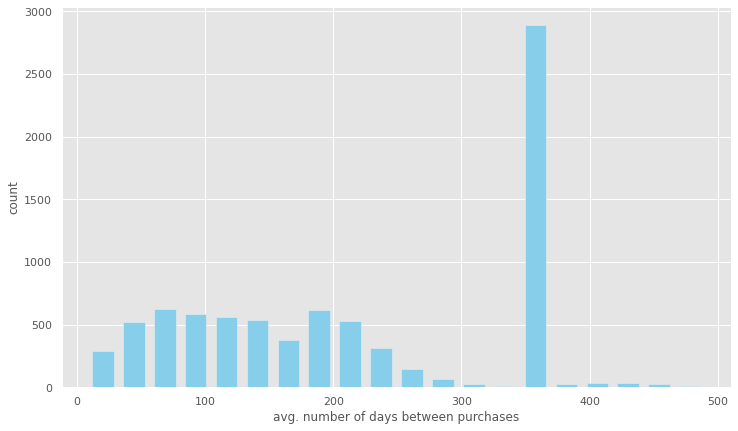

In [74]:
# Now we create a distribution for the average times between sales
ax = summary_df['date_purchase_frequency'].hist(bins=20, color='skyblue', rwidth=0.7, figsize=(12,7))

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

## Transaction periods by mounth 

In [75]:
# Use 3M for 3 month
clv_freq = '3M'

# Groupby customer ID now, and group all invoices for 3 month cycles.
# Aggregate on sum, mean and counts
data_df = orders_df.groupby(['Customer ID', pd.Grouper(key='Date', freq=clv_freq)]).agg({
    'Revenue': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,Customer ID,Date,revenue_sum,revenue_avg,revenue_count
0,11000,2013-01-31,2856,2856.0,1
1,11000,2013-07-31,3037,3037.0,1
2,11000,2013-10-31,2010,1005.0,2
3,11000,2014-01-31,4859,2429.5,2
4,11000,2014-04-30,2856,2856.0,1


In [76]:
# Adding Recency 'M'

# Get the M
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['Date'].unique(), reverse=True))}

# Create our M Column
data_df['M'] = data_df['Date'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

,Customer ID,Date,revenue_sum,revenue_avg,revenue_count,M
0,11000,2013-01-31,2856,2856.0,1,M_14
1,11000,2013-07-31,3037,3037.0,1,M_12
2,11000,2013-10-31,2010,1005.0,2,M_11
3,11000,2014-01-31,4859,2429.5,2,M_10
4,11000,2014-04-30,2856,2856.0,1,M_9


In [77]:
data_df['M'].unique()

array(['M_14', 'M_12', 'M_11', 'M_10', 'M_9', 'M_8', 'M_7', 'M_5', 'M_4',
       'M_3', 'M_2', 'M_1', 'M_13', 'M_6', 'M_18', 'M_21', 'M_17', 'M_19',
       'M_15', 'M_20', 'M_16', 'M_22'], dtype=object)

# Best Customer

In [78]:
best_customer = df.groupby('Customer ID',as_index=False).agg({'Order Quantity':'count'}).sort_values('Order Quantity',ascending=False)

In [79]:
best_customer.head()

,Customer ID,Order Quantity
1784,14291,300
2356,15536,252
2304,15388,244
2469,15770,234
2299,15365,232


#### we can see here that's most customer order was "14291"